### 範例
接下來的程式碼會示範如何定義一個簡單的 CNN model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 使用 colab 環境的同學請執行以下程式碼
# %tensorflow_version 1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2
# import tensorflow as tf
# print(tf.__version__)

# import os
# from google.colab import drive 
# drive.mount('/content/gdrive') # 將 google drive 掛載在 colob，
# %cd 'gdrive/My Drive'
# os.system("mkdir cupoy_cv_part4") # 可以自己改路徑
# %cd cupoy_cv_part4 # 可以自己改路徑

In [2]:
# 讀取資料集以及做前處理的函數
def load_data(dirname):
    # 讀取 csv 文件
    data = pd.read_csv(dirname)
    # 過濾有缺失值的 row
    data = data.dropna()

    # 將圖片像素值讀取為 numpy array 的形態
    data['Image'] = data['Image'].apply(lambda img: np.fromstring(img, sep=' ')).values 

    # 單獨把圖像 array 抽取出來
    imgs = np.vstack(data['Image'].values)/255
    # reshape 為 96 x 96
    imgs = imgs.reshape(data.shape[0], 96, 96)
    # 轉換為 float
    imgs = imgs.astype(np.float32)
    
    # 提取坐標的部分
    points = data[data.columns[:-1]].values

    # 轉換為 float
    points = points.astype(np.float32)

    # normalize 坐標值到 [-0.5, 0.5]
    points = points/96 - 0.5
    
    return imgs, points

In [3]:
# 讀取資料
imgs_train, points_train = load_data(dirname = 'training.csv')
print("圖像資料:", imgs_train.shape, "\n關鍵點資料:", points_train.shape)

圖像資料: (2140, 96, 96) 
關鍵點資料: (2140, 30)


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Using TensorFlow backend.


In [5]:
# 回傳定義好的 model 的函數
def get_model():
    # 定義人臉關鍵點檢測網路
    model = Sequential()

    # 定義神經網路的輸入
    model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(96, 96, 1)))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))

    # 最後輸出 30 維的向量，也就是 15 個關鍵點的值
    model.add(Dense(30))
    return model

In [6]:
model = get_model()
# 配置 loss funtion 和 optimizer
model.compile(loss='mean_squared_error', optimizer='adam')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [7]:
# 印出網路結構
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         73856     
__________

In [8]:
from keras.callbacks import ModelCheckpoint, History
# model checkpoint 
checkpoint = ModelCheckpoint('best_weights.h5', verbose=1, save_best_only=True)
hist = History()

In [9]:
# training the model
hist_model = model.fit(imgs_train.reshape(-1, 96, 96, 1), 
                       points_train, 
                       validation_split=0.2, batch_size=64, callbacks=[checkpoint, hist],
                       shuffle=True, epochs=150, verbose=1)
# save the model weights
model.save_weights('weights.h5')
# save the model
model.save('model.h5')




Train on 1712 samples, validate on 428 samples
Epoch 1/150





1712/1712 [==============================] - 7s 4ms/step - loss: 0.0068 - val_loss: 0.0023

Epoch 00001: val_loss improved from inf to 0.00235, saving model to best_weights.h5
Epoch 2/150
1712/1712 [==============================] - 6s 3ms/step - loss: 0.0017 - val_loss: 0.0019

Epoch 00002: val_loss improved from 0.00235 to 0.00191, saving model to best_weights.h5
Epoch 3/150
1712/1712 [==============================] - 6s 3ms/step - loss: 0.0013 - val_loss: 0.0019

Epoch 00003: val_loss improved from 0.00191 to 0.00190, saving model to best_weights.h5
Epoch 4/150
1712/1712 [==============================] - 6s 3ms/step - loss: 0.0012 - val_loss: 0.0019

Epoch 00004: val_loss improved from 0.00190 to 0.00189, saving model to best_weights.h5
Epoch 5/150
1712/1712 [==============================] - 6s 3ms/step - loss: 0.0011 - val_loss: 0.0018

Epoch 00005: val_loss improved from 0.00189 to 0.00183, saving model to best_

1712/1712 [==============================] - 5s 3ms/step - loss: 2.4692e-04 - val_loss: 8.2327e-04

Epoch 00035: val_loss did not improve from 0.00078
Epoch 36/150
1712/1712 [==============================] - 5s 3ms/step - loss: 2.4520e-04 - val_loss: 7.9703e-04

Epoch 00036: val_loss did not improve from 0.00078
Epoch 37/150
1712/1712 [==============================] - 5s 3ms/step - loss: 2.3734e-04 - val_loss: 8.1219e-04

Epoch 00037: val_loss did not improve from 0.00078
Epoch 38/150
1712/1712 [==============================] - 5s 3ms/step - loss: 2.3362e-04 - val_loss: 8.2560e-04

Epoch 00038: val_loss did not improve from 0.00078
Epoch 39/150
1712/1712 [==============================] - 5s 3ms/step - loss: 2.3923e-04 - val_loss: 7.9668e-04

Epoch 00039: val_loss did not improve from 0.00078
Epoch 40/150
1712/1712 [==============================] - 5s 3ms/step - loss: 2.2209e-04 - val_loss: 8.1436e-04

Epoch 00040: val_loss did not improve from 0.00078
Epoch 41/150
1712/1712 [=====

1712/1712 [==============================] - 5s 3ms/step - loss: 1.4294e-04 - val_loss: 7.5573e-04

Epoch 00084: val_loss did not improve from 0.00075
Epoch 85/150
1712/1712 [==============================] - 6s 3ms/step - loss: 1.4002e-04 - val_loss: 7.7800e-04

Epoch 00085: val_loss did not improve from 0.00075
Epoch 86/150
1712/1712 [==============================] - 5s 3ms/step - loss: 1.4024e-04 - val_loss: 7.7897e-04

Epoch 00086: val_loss did not improve from 0.00075
Epoch 87/150
1712/1712 [==============================] - 5s 3ms/step - loss: 1.3449e-04 - val_loss: 7.7126e-04

Epoch 00087: val_loss did not improve from 0.00075
Epoch 88/150
1712/1712 [==============================] - 5s 3ms/step - loss: 1.3242e-04 - val_loss: 8.0672e-04

Epoch 00088: val_loss did not improve from 0.00075
Epoch 89/150
1712/1712 [==============================] - 6s 3ms/step - loss: 1.3567e-04 - val_loss: 7.6712e-04

Epoch 00089: val_loss did not improve from 0.00075
Epoch 90/150
1712/1712 [=====

1712/1712 [==============================] - 6s 4ms/step - loss: 1.0031e-04 - val_loss: 7.7450e-04

Epoch 00134: val_loss did not improve from 0.00075
Epoch 135/150
1712/1712 [==============================] - 6s 4ms/step - loss: 1.0066e-04 - val_loss: 8.0618e-04

Epoch 00135: val_loss did not improve from 0.00075
Epoch 136/150
1712/1712 [==============================] - 6s 4ms/step - loss: 1.0647e-04 - val_loss: 8.2201e-04

Epoch 00136: val_loss did not improve from 0.00075
Epoch 137/150
1712/1712 [==============================] - 6s 3ms/step - loss: 1.1156e-04 - val_loss: 7.9991e-04

Epoch 00137: val_loss did not improve from 0.00075
Epoch 138/150
1712/1712 [==============================] - 6s 3ms/step - loss: 1.0136e-04 - val_loss: 7.9150e-04

Epoch 00138: val_loss did not improve from 0.00075
Epoch 139/150
1712/1712 [==============================] - 6s 3ms/step - loss: 9.7856e-05 - val_loss: 8.0124e-04

Epoch 00139: val_loss did not improve from 0.00075
Epoch 140/150
1712/1712 

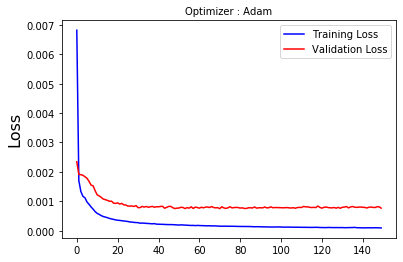

In [10]:
# loss 值的圖
plt.title('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist_model.history['loss'], color='b', label='Training Loss')
plt.plot(hist_model.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

### 觀察 model 在 testing 上的結果

In [11]:
# 讀取測試資料集
imgs_test, _ = load_data(dirname = 'test.csv')

In [12]:
# 在灰階圖像上畫關鍵點的函數
def plot_keypoints(img, points):
    plt.imshow(img, cmap='gray')
    for i in range(0,30,2):
        plt.scatter((points[i] + 0.5)*96, (points[i+1]+0.5)*96, color='red')

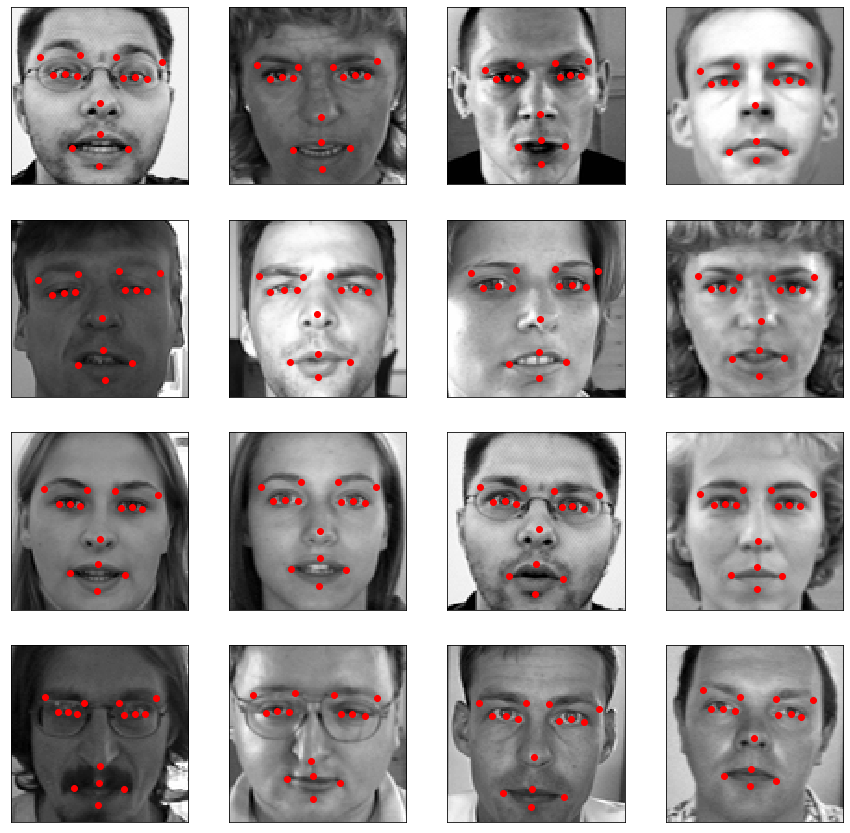

In [13]:
fig = plt.figure(figsize=(15,15))
# 在測試集圖片上用剛剛訓練好的模型做關鍵點的預測
points_test = model.predict(imgs_test.reshape(imgs_test.shape[0], 96, 96, 1))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_keypoints(imgs_test[i], np.squeeze(points_test[i]))

目前為止，大致可以觀察到，直接使用簡單的模型以及訓練方式在這組數據上應該可以在訓練集和測試集上都得到一個還不錯的結果，說明這組資料其實不會很難。

### 作業
請嘗試使用 flip (左右翻轉) 來做 augmentation 以降低人臉關鍵點檢測的 loss

Note: 圖像 flip 之後，groundtruth 的關鍵點也要跟著 flip 哦




In [14]:
model_with_augment = get_model()
model_with_augment.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
# Your code
img_flip_train=np.flip(imgs_train)
points_train_flip=np.flip(points_train)

In [16]:
checkpoint = ModelCheckpoint('weights.h5', verbose=1, save_best_only=True)
hist = History()

In [18]:
# training the model
hist_model = model.fit(img_flip_train.reshape(-1, 96, 96, 1), 
                       points_train_flip, 
                       validation_split=0.2, batch_size=64, callbacks=[checkpoint, hist],
                       shuffle=True, epochs=100, verbose=1)
# save the model weights
model.save_weights('weights_flip.h5')
# save the model
model.save('model_flip.h5')

Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 6s 3ms/step - loss: 0.0088 - val_loss: 8.8176e-04

Epoch 00001: val_loss improved from inf to 0.00088, saving model to weights.h5
Epoch 2/100
1712/1712 [==============================] - 6s 3ms/step - loss: 0.0017 - val_loss: 9.0529e-04

Epoch 00002: val_loss did not improve from 0.00088
Epoch 3/100
1712/1712 [==============================] - 6s 3ms/step - loss: 0.0016 - val_loss: 8.7343e-04

Epoch 00003: val_loss improved from 0.00088 to 0.00087, saving model to weights.h5
Epoch 4/100
1712/1712 [==============================] - 6s 3ms/step - loss: 0.0015 - val_loss: 8.6278e-04

Epoch 00004: val_loss improved from 0.00087 to 0.00086, saving model to weights.h5
Epoch 5/100
1712/1712 [==============================] - 6s 4ms/step - loss: 0.0014 - val_loss: 8.6317e-04

Epoch 00005: val_loss did not improve from 0.00086
Epoch 6/100
1712/1712 [==============================] - 6s 3ms/st

1712/1712 [==============================] - 6s 3ms/step - loss: 3.4635e-04 - val_loss: 2.3258e-04

Epoch 00046: val_loss did not improve from 0.00022
Epoch 47/100
1712/1712 [==============================] - 6s 3ms/step - loss: 3.4416e-04 - val_loss: 2.2420e-04

Epoch 00047: val_loss did not improve from 0.00022
Epoch 48/100
1712/1712 [==============================] - 6s 3ms/step - loss: 3.3900e-04 - val_loss: 2.2201e-04

Epoch 00048: val_loss did not improve from 0.00022
Epoch 49/100
1712/1712 [==============================] - 6s 3ms/step - loss: 3.3981e-04 - val_loss: 2.2286e-04

Epoch 00049: val_loss did not improve from 0.00022
Epoch 50/100
1712/1712 [==============================] - 5s 3ms/step - loss: 3.3070e-04 - val_loss: 2.1452e-04

Epoch 00050: val_loss improved from 0.00022 to 0.00021, saving model to weights.h5
Epoch 51/100
1712/1712 [==============================] - 6s 3ms/step - loss: 3.2887e-04 - val_loss: 2.0969e-04

Epoch 00051: val_loss improved from 0.00021 to 0

1712/1712 [==============================] - 5s 3ms/step - loss: 2.3017e-04 - val_loss: 1.9435e-04

Epoch 00093: val_loss did not improve from 0.00019
Epoch 94/100
1712/1712 [==============================] - 5s 3ms/step - loss: 2.3348e-04 - val_loss: 1.9237e-04

Epoch 00094: val_loss did not improve from 0.00019
Epoch 95/100
1712/1712 [==============================] - 5s 3ms/step - loss: 2.3015e-04 - val_loss: 1.8986e-04

Epoch 00095: val_loss did not improve from 0.00019
Epoch 96/100
1712/1712 [==============================] - 6s 3ms/step - loss: 2.3425e-04 - val_loss: 1.9713e-04

Epoch 00096: val_loss did not improve from 0.00019
Epoch 97/100
1712/1712 [==============================] - 5s 3ms/step - loss: 2.2383e-04 - val_loss: 1.8145e-04

Epoch 00097: val_loss improved from 0.00019 to 0.00018, saving model to weights.h5
Epoch 98/100
1712/1712 [==============================] - 6s 3ms/step - loss: 2.2482e-04 - val_loss: 1.8953e-04

Epoch 00098: val_loss did not improve from 0.000

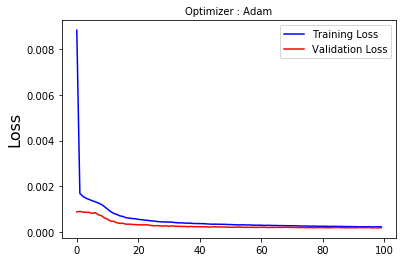

In [19]:
# loss 值的圖
plt.title('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist_model.history['loss'], color='b', label='Training Loss')
plt.plot(hist_model.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')